In [114]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")

In [169]:
def importa_dados(raiz='dados'):
    sistemas = os.listdir(path=raiz)
    buffer_list = list()

    for sistema in sistemas:
        arquivos = os.listdir(path=os.path.join(raiz, sistema))
        for arquivo in arquivos:
            caminho = os.path.join(raiz, sistema, arquivo)
            buffer = pd.read_csv(caminho, sep=';')
            buffer['tamanho'] = arquivo[:-4]
            buffer['sistema'] = sistema
            buffer_list.append(buffer)
    dados = pd.concat(buffer_list, axis=0, ignore_index=True)
    return dados

def separa_dados(dataframe, sistema):
    operacoes = ['criacao', 'leitura', 'remocao']
    return {
            oper: dataframe[(dataframe['sistema'] == sistema) & (dados['operacao'] == oper)]
            for oper in operacoes
            }

def plota_barras(dataframe, sistema):
    f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
    f.suptitle('Comparação entre médias de tempo para cada operação no sistema {}'.format(sistema), fontsize=16)

    rotulos = dataframe.keys()

    for count, rotulo in enumerate(rotulos):

        sns.barplot(x=dataframe[rotulo].tamanho, 
                    y=dataframe[rotulo].tempo, 
                    data=dataframe[rotulo], 
                    estimator=np.mean, 
                    ci='sd', 
                    order=['5KB','10KB','100KB','1MB','10MB','100MB','500MB'], 
                    ax=axes[count])
        axes[count].set_yscale("log")
        axes[count].set_ylabel("tempo (s)")
        axes[count].set_title(rotulo)
        
def plota_iteracoes(dataframe, sistema, tamanho):
    f, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 5))
    f.suptitle('Tempo ao longo das iterações - tamanho: {} - sistema: {}'.format(tamanho, sistema), fontsize=16)

    plt.setp(axes, xticks=range(0, 10), xticklabels=range(0, 10))

    rotulos = dataframe.keys()

    for count, rotulo in enumerate(rotulos):
        temp = dataframe[rotulo][dados['tamanho'] == tamanho]
        sns.lineplot(x=range(0, 10), 
                     y="tempo", 
                     data=temp, 
                     ax=axes[count])
        axes[count].set_ylabel("tempo (s)")
        axes[count].set_title(rotulo)

In [3]:
dados = importa_dados()
dados.shape

(630, 4)

In [4]:
dados.describe()

,tempo
count,630.000000
mean,0.031400
std,0.152790
min,0.000013
25%,0.000051
50%,0.000180
75%,0.004493
max,1.559837


### Ext4

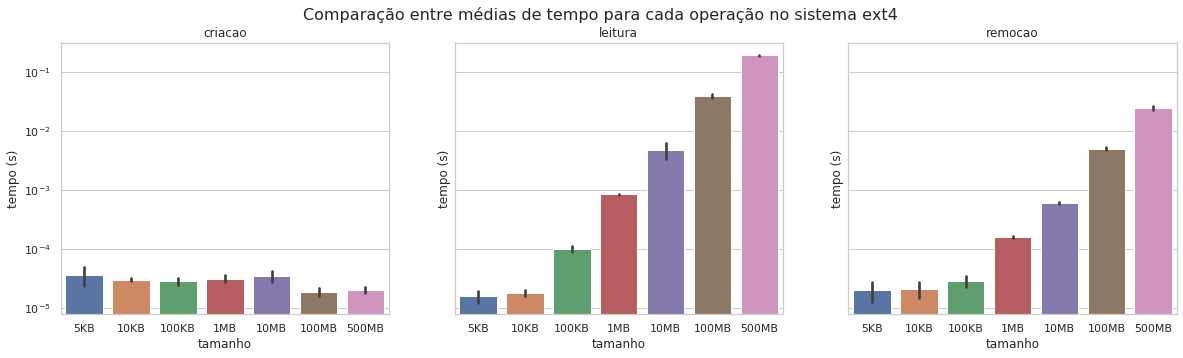

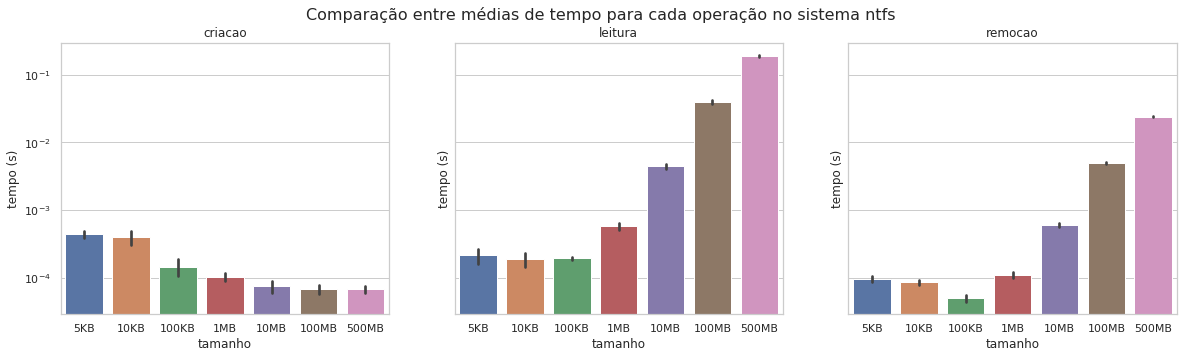

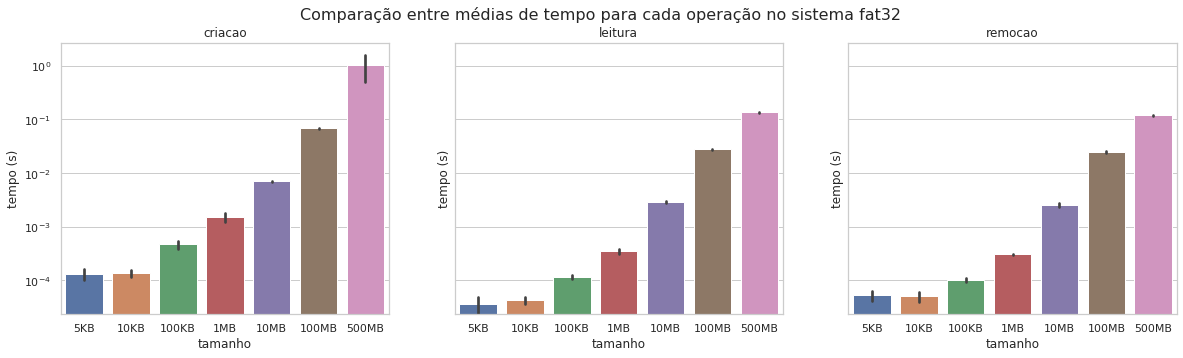

In [179]:
sistemas = dados.sistema.unique()
for sistema in sistemas:
    df = separa_dados(dados, sistema=sistema)
    plota_barras(df, sistema)

/home/rogers/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


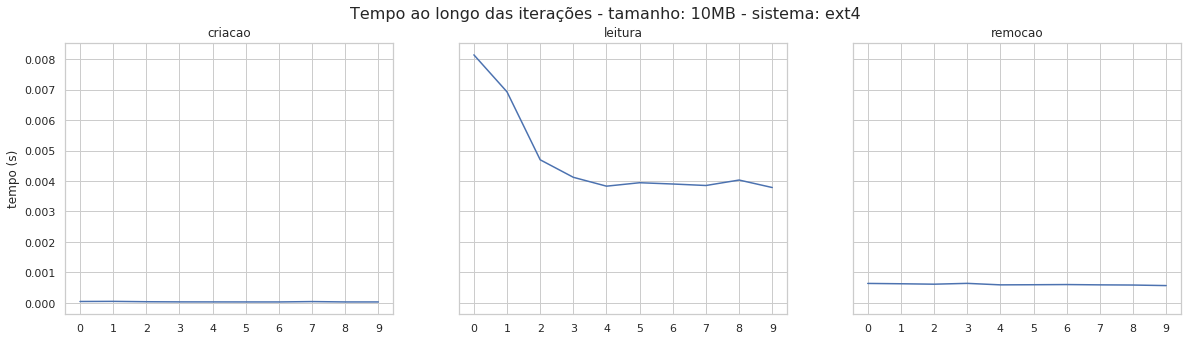

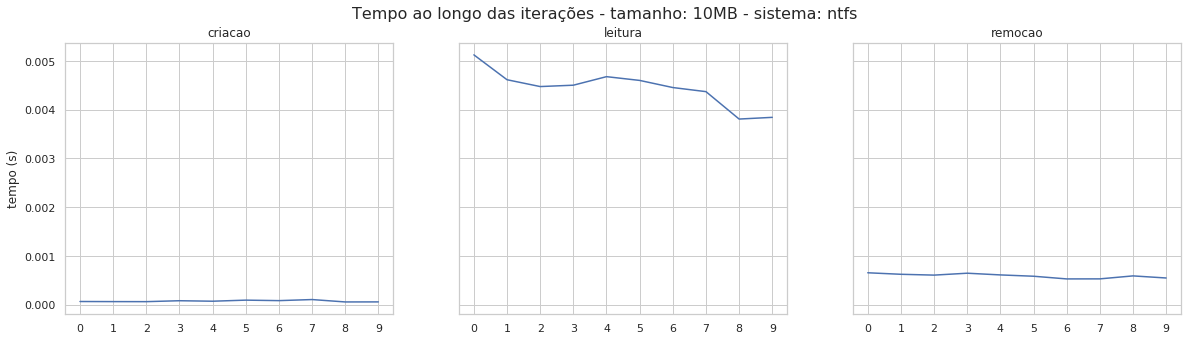

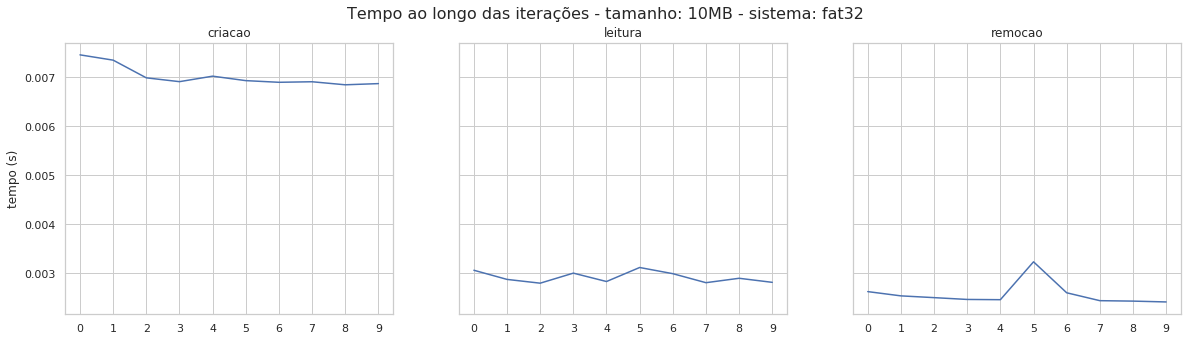

In [184]:
for sistema in sistemas:
    df = separa_dados(dados, sistema=sistema)
    plota_iteracoes(df, sistema, '10MB')

### Comparação geral entre os sistemas usando a média

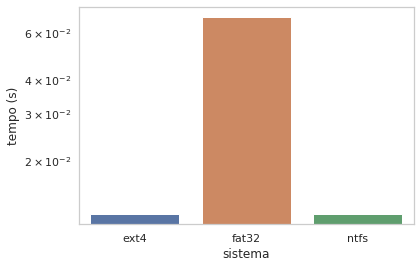

In [180]:
media_criacao = dados.groupby(['sistema'], axis=0).mean()
media_criacao[media_criacao.index.name] = media_criacao.index
media_criacao.reset_index(drop=True, inplace=True)
ax = sns.barplot(x=media_criacao.sistema, y=media_criacao.tempo, data=media_criacao)
ax.set_yscale("log"); ax.set_ylabel("tempo (s)");